

```
# This is formatted as code
```


# Supplementary material

Authors:  S. Kokabisaghi and E.J. Pauwels 

Affiliation:  Centrum Wiskunde & Informatica (CWI), Amsterdam, Netherlands.

This notebook provides supplementary material supporting the exposition in the paper: 

S. Kokabisaghi, A. Dorsman, E.J. Pauwels: 
Transitions in sniping behaviour among competing high-frequency traders 

Date:  1 Sept 2020

Version:  1.0




In [ ]:
# Required Libraries
import numpy as np
from sympy import *
import pandas as pd # for table

import matplotlib.pyplot as plt # for plotting 

from IPython.display import Latex 
import copy # To clone dictionaries


In [ ]:
# Libraries for plotting
plt.rcParams["font.weight"] = "bold"# Bold text in plot
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["figure.figsize"] = [10,8]
import warnings
warnings.filterwarnings("ignore")

# Numerical Analysis:

0. [**Introduce symbols and initial parameters**](#scrollTo=bLbPSrYNHuEP&line=2&uniqifier=1)

1. [**Recall equations**](#scrollTo=mgv122KRK770&line=10&uniqifier=1)

2. [**Compute the indifference point**](#scrollTo=8HiRhe86I_E7&line=5&uniqifier=1)

   2.0. [Compute/ plot Equilibrium utility and spread in sure sniping (p = 1)](#scrollTo=E4WoHJdqedCo&line=1&uniqifier=1)

  2.1. [Sure sniping visualization](#scrollTo=s1Me983DVxe2&line=3&uniqifier=1)

3. [**Transition thresholds in sniping behaviour:**](#scrollTo=pqwRKNwbuNLs&line=9&uniqifier=1) 

   3.0.[Compute transition thresholds by solving $\frac{du*}{dp}|p$  when p=0, 1](#scrollTo=pqwRKNwbuNLs&line=9&uniqifier=1) 

   3.1. [Visualization](#scrollTo=i6LJ63Edh2tM&line=1&uniqifier=1)

   3.2. [The dependancy of transition thresholds on (news ($\alpha$)](#scrollTo=aEJxOF-eFdWE&line=5&uniqifier=1) 

  3.3. [The dependancy of transition thresholds on ( LT arrival ($\mu$)](#scrollTo=t3Xwr8Xf4c5x&line=4&uniqifier=1) 

   3.4. [When is the probabilistic sniping advantagous?:](#scrollTo=dETg0Y9TwzPI&line=6&uniqifier=1) 

4. [ **Expected Utility and Individual sniping probability**
](#scrollTo=bFH8oilu36Zh&line=3&uniqifier=1) 

5. [**Equilibrium utility and spread in probabilistic sniping $u^*(p^*), s^*(p^*)$**](#scrollTo=R00jU2J4mDVM&line=1&uniqifier=1)
 
6. [**Quantify if there is/are deceptive agents**](#scrollTo=CQpAcRKJHpnk&line=6&uniqifier=1) 

 6.0. [Expected utility for trustworthy agents](#scrollTo=7Jtspgm9TW3w&line=1&uniqifier=1)

 6.1. [Visualization: expected utility for trustworthy agents in equilibrium point](#scrollTo=I4Kc4T0_TTsS&line=10&uniqifier=1)

 8.2. [Visualization: expected utility for deceptive agents in equilibrium](#scrollTo=ydzS0OryQZUU&line=6&uniqifier=1)




# 0. Introduce symbols and values

In this notebook we will perform both symbolic and numerical calculations, for which we here introduce the symbols and some values. 

In [ ]:
# Introduce the primary parameters as Symbol

from sympy.abc import s, alpha, mu, delta, gamma, sigma, p, H  

# introduce the symbols for secondary parameters (are functions of the primary parameters)

from sympy.abc import beta, g,h,q, m 
alphabar = symbols('alphabar')
mubar = symbols('mubar')
thetabar = symbols('thetabar')
m = 1-mubar

'''
beta = alpha/(alpha+mu)
alphabar =  Rational(1,2)*alpha*delta    
mubar = Rational(1,2)*mu*delta
m = 1-mubar
q = gamma-1
thetabar = 2*alphabar*mubar/(alphabar+mubar)
h = ( p*H - 1 + (1-p)**H)/ (p*H)
g = h/((H-1)*p)
'''

#  Introduce some numerical values for the primary paramaters and use them 
#  to compute the corresponding values for the secondary (i.e. derived) parameters

alpha_val = .45
mu_val  = .5
delta_val = .5
H_val = 5
gamma_val = 1.5
sigma_val =1
#s_val = .45
#
beta_val = alpha_val/(alpha_val + mu_val)
alphabar_val = alpha_val * delta_val/2
mubar_val = mu_val * delta_val/2
q_val = gamma_val -1
thetabar_val = 2*alphabar_val*mubar_val/(alphabar_val+mubar_val)
m_val = 1- mubar_val

#  Create a dictionary that makes the appropriate substitutions for numerical experiments 


dict_subs_numerical_vals = {alpha: alpha_val, mu : mu_val, delta :delta_val, H : H_val, gamma :gamma_val, q: q_val, 
                            beta: beta_val, mubar:mubar_val, thetabar :thetabar_val, alphabar: alphabar_val, m:m_val}

print('-------- Initial parameters for the game : --------')
print(dict_subs_numerical_vals)


-------- Initial parameters for the game : --------
{alpha: 0.45, mu: 0.5, delta: 0.5, H: 5, gamma: 1.5, q: 0.5, beta: 0.4736842105263158, mubar: 0.125, thetabar: 0.11842105263157895, alphabar: 0.1125, -mubar + 1: 0.875}


# 1. Recall equations from KPD.Supplementary_1



In [ ]:
#--------------------
# Utility end points 
#--------------------
# bandit
A = beta*g*p*(-mubar + 1)
B = beta*g*p*(alphabar*(-gamma + 1))

# market maker
C = beta*h*(mubar*q  - m*gamma) - q*thetabar  
D = -beta*(alphabar*h*q + m) + (mubar + 1)

#--------------------
# Utility
#--------------------
EU_B =  beta*g*p*(-alphabar*gamma*s + alphabar*s + mubar*s - mubar - s + 1)

#EU_B = beta*g*p*(-2*alphabar*gamma*s + 2*alphabar*(-s + 2) + 2*mubar*(-s + 1) + 2*(-s + 1)*(-2*alphabar - 2*mubar + 1))


EU_M =  -alphabar*beta*gamma*h*s - alphabar*beta*gamma*s + alphabar*beta*gamma + alphabar*beta*h*s + alphabar*beta*s - alphabar*beta + alphabar*gamma*s - alphabar*gamma - alphabar*s + alphabar - 2*beta*gamma*h*mubar*s + 2*beta*gamma*h*mubar + beta*gamma*h*s - beta*gamma*h + beta*gamma*mubar*s - beta*gamma*mubar + beta*h*mubar*s - beta*h*mubar + beta*mubar - beta*s + mubar*s + s
#--------------------
# Transition tresholds for sniping behaviour 
#--------------------

# gamma_K_cond is du/dp| (p=1) = 0
gamma_K_cond = -(-H*alphabar*beta*(gamma - 1) - H*beta*gamma*mubar + H*beta*gamma - H*beta*mubar*(gamma - 1) + 2*alphabar*beta*(gamma - 1) + beta*gamma*mubar - beta*gamma + beta*mubar*(gamma - 1) - beta*mubar + beta)*(H*alphabar*beta**2*gamma*mubar*(gamma - 1) - H*alphabar*beta**2*gamma*(gamma - 1) + H*alphabar*beta**2*mubar*(gamma - 1)**2 + H*alphabar*beta**2*mubar*(gamma - 1) - H*alphabar*beta**2*(gamma - 1) - H*alphabar*beta*thetabar*(gamma - 1)**2 - H*beta**2*mubar**2 + 2*H*beta**2*mubar - H*beta**2 - H*beta*mubar**2 + H*beta - alphabar*beta**2*gamma*mubar*(gamma - 1) + alphabar*beta**2*gamma*(gamma - 1) - alphabar*beta**2*mubar*(gamma - 1)**2 - alphabar*beta**2*mubar*(gamma - 1) + alphabar*beta**2*(gamma - 1)) + (-H*alphabar*beta*(gamma - 1) - H*beta*gamma*mubar + H*beta*gamma - H*beta*mubar*(gamma - 1) + H*beta*mubar - H*beta + H*mubar + H*thetabar*(gamma - 1) + H + 2*alphabar*beta*(gamma - 1) + beta*gamma*mubar - beta*gamma + beta*mubar*(gamma - 1) - beta*mubar + beta)*(2*H*alphabar*beta**2*gamma*mubar*(gamma - 1) - 2*H*alphabar*beta**2*gamma*(gamma - 1) + 2*H*alphabar*beta**2*mubar*(gamma - 1)**2 + 2*H*alphabar*beta**2*mubar*(gamma - 1) - 2*H*alphabar*beta**2*(gamma - 1) - H*alphabar*beta*thetabar*(gamma - 1)**2 - H*beta**2*mubar**2 + 2*H*beta**2*mubar - H*beta**2 - H*beta*mubar**2 + H*beta - 2*alphabar*beta**2*gamma*mubar*(gamma - 1) + 2*alphabar*beta**2*gamma*(gamma - 1) - 2*alphabar*beta**2*mubar*(gamma - 1)**2 - 2*alphabar*beta**2*mubar*(gamma - 1) + 2*alphabar*beta**2*(gamma - 1))

# gamma_L_cond is du/dp| (p=0) = 0
poly_dN_dp_0 = -alphabar*beta*thetabar/2*q**2 - beta**2*mubar**2/2 + beta**2*mubar - beta**2/2 - beta*mubar**2/2 + beta/2
gamma_L_cond = poly_dN_dp_0


#2. Compute the indifference point: 
(**KPD. section 2.4**)

In [ ]:
# Computing optimal utility (U*(p))
N =  A - C + D - B
Q = A*D - B*C

# Optimal utility is the following:
u_star =( A *D - B*C)/N
print('Indifference Utility u*(p):')
print(u_star)

# Optimal spread:

s_star = (A - C)/ N
print('\n Indifference Spread s*(p) = ')
print(s_star)


Indifference Utility u*(p):
(-alphabar*beta*g*p*(-gamma + 1)*(beta*h*(-gamma*(-mubar + 1) + mubar*q) - q*thetabar) + beta*g*p*(-mubar + 1)*(-beta*(alphabar*h*q - mubar + 1) + mubar + 1))/(-alphabar*beta*g*p*(-gamma + 1) + beta*g*p*(-mubar + 1) - beta*h*(-gamma*(-mubar + 1) + mubar*q) - beta*(alphabar*h*q - mubar + 1) + mubar + q*thetabar + 1)

 Indifference Spread s*(p) = 
(beta*g*p*(-mubar + 1) - beta*h*(-gamma*(-mubar + 1) + mubar*q) + q*thetabar)/(-alphabar*beta*g*p*(-gamma + 1) + beta*g*p*(-mubar + 1) - beta*h*(-gamma*(-mubar + 1) + mubar*q) - beta*(alphabar*h*q - mubar + 1) + mubar + q*thetabar + 1)


#2.0. Compute Equilibrium utility and spread in sure sniping (p = 1):


In [ ]:
# Update the dictionary of values for numerical computation:

# We recall sniping probability to the dictionary
h = ( p*H - 1 + (1-p)**H)/ (p*H)
g = h/((H-1)*p)

h_numeric = h.subs(dict_subs_numerical_vals)
g_numeric = g.subs(dict_subs_numerical_vals)

dict_subs_numerical_vals['h'] = h_numeric
dict_subs_numerical_vals['g'] = g_numeric
print('')
print('====== Check the dictionary ======')
print('')
print(dict_subs_numerical_vals)
print('')

print('============ Equilibrium utility spread in sure sniping (p = 1) =============')
# In the case of Sure sniping
dict_subs_numerical_vals[p] = 1


s_star_sure_sniping = s_star.subs(dict_subs_numerical_vals)

u_star_sure_sniping = u_star.subs(dict_subs_numerical_vals)
#
print('\n s*(p=1) = ', s_star_sure_sniping)
print('\n u*(p=1) = ', u_star_sure_sniping)
#
# To check the equilibrium EU_MM(s*) = EU_B(s*)= u* 

print('\n\n============ EU_MM(s*) = EU_B(s*)= u* ============')
print('\nChecking that at point of indifference, the expected utility of MM and bandit coincide')

# we update dictionary by adding s*
dict_subs_numerical_vals[s] = s_star_sure_sniping

#print(type(s_star_sure_sniping))

# Compute utilities for bandit and market maker in s*
EU_B_numeric= EU_B.subs(dict_subs_numerical_vals)

EU_M_numeric = EU_M.subs(dict_subs_numerical_vals)

print('')
print('EU_M (s*) = ', EU_M_numeric)
print('')
print('EU_B (s*) = ', EU_B_numeric)



====== Check the dictionary ======

{alpha: 0.45, mu: 0.5, delta: 0.5, H: 5, gamma: 1.5, q: 0.5, beta: 0.4736842105263158, mubar: 0.125, thetabar: 0.11842105263157895, alphabar: 0.1125, -mubar + 1: 0.875, 'h': (5*p + (-p + 1)**5 - 1)/(5*p), 'g': (5*p + (-p + 1)**5 - 1)/(20*p**2)}

============ Equilibrium utility spread in sure sniping (p = 1) =============

 s*(p=1) =  0.469950293718934

 u*(p=1) =  0.0414339905344020


============ EU_MM(s*) = EU_B(s*)= u* ============

Checking that at point of indifference, the expected utility of MM and bandit coincide

EU_M (s*) =  0.0414339905344021

EU_B (s*) =  0.0414339905344020


#2.1. Sure sniping visualisation: $(s^*,u^*)$

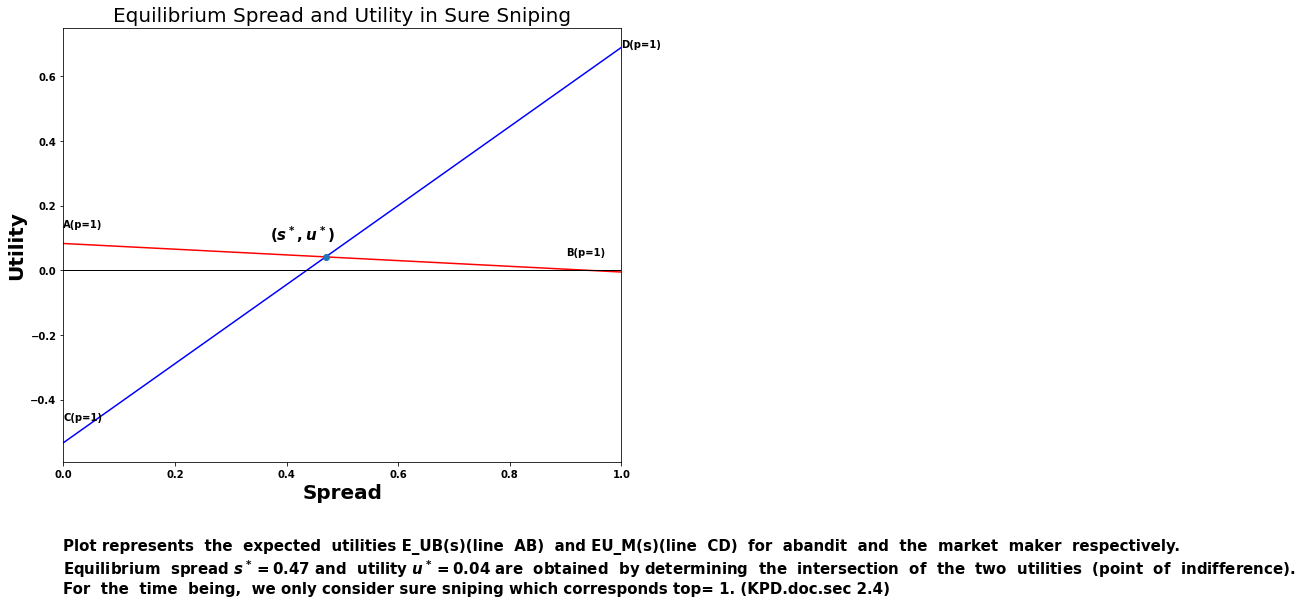

In [ ]:
# KPD.fig.2 represents the equilibrium spread and utility in sure sniping

# EU_B(s)(line  AB)  and EU_M(s)(line  CD)  for  abandit  and  the  market  maker  respectively.  
# Equilibrium  spread (s*) and  utility (u*) are obtained 
# by determining the intersection of the two utilities (point  of  indifference).   

A_numeric = A.subs(dict_subs_numerical_vals)
B_numeric = B.subs(dict_subs_numerical_vals)

C_numeric = C.subs(dict_subs_numerical_vals)
D_numeric = D.subs(dict_subs_numerical_vals)


plt.plot( [0, s_star_sure_sniping,1], [A_numeric,u_star_sure_sniping,B_numeric], 'r')
plt.plot( [0, s_star_sure_sniping,1],[C_numeric,u_star_sure_sniping,D_numeric], 'b')
plt.plot(s_star_sure_sniping, u_star_sure_sniping, 'o')

plt.axhline(linewidth=1, color='k')
plt.title("Equilibrium Spread and Utility in Sure Sniping",fontsize=20)
plt.ylabel ("Utility",fontsize=20)
plt.xlabel("Spread",fontsize=20)

plt.text(s_star_sure_sniping-0.1, u_star_sure_sniping+.05, "$(s^*, u^*)$",fontsize=15)
plt.text(0,A_numeric +0.05, "A(p=1)")
plt.text(0.9, B_numeric+0.05,"B(p=1)")
plt.text(0,C_numeric+.02 +0.05, "C(p=1)")
plt.text(1, D_numeric,"D(p=1)")
plt.xlim(0,1);
caption = '''
Plot represents  the  expected  utilities E_UB(s)(line  AB)  and EU_M(s)(line  CD)  for  abandit  and  the  market  maker  respectively.
Equilibrium  spread $s^* = ${} and  utility $u^*=${} are  obtained  by determining  the  intersection  of  the  two  utilities  (point  of  indifference).
For  the  time  being,  we only consider sure sniping which corresponds top= 1. (KPD.doc.sec 2.4) '''.format(round(s_star_sure_sniping,2),round(u_star_sure_sniping,2));

plt.text(0,-1,caption, fontsize = 15);


# 3. Transition thresholds in sniping behaviour :
##3.0.Transition Thresholds (Risk Aversion factors) 
**(KPD.section.4)**



In [ ]:
# Transition Thresholds:
#---------------------------
# Risk aversion factor (gamma) as symbol
dict_subs_numerical_vals[gamma] = gamma
#
print('============= Transition threshold (gamma_bar_K) =============')

# We computed gamma_K_cond in section.4, that is the result of du*/dp|(p=1) =0

gamma_K_cond_numeric = gamma_K_cond.subs(dict_subs_numerical_vals)

# solving above equation gives the unique threshold we expect, that is the 
# zero-crossing and positive root >1. 

gamma_bar_K = solveset(gamma_K_cond_numeric,gamma)

list_roots = list(gamma_bar_K)
print('')
print('-------------- list of polynomial roots ----------------')
print(' polynomial roots= ', list_roots)
print('')

print('-------------- Positive root >1  ----------------')
gamma_bar_K =  list_roots[0]
print('gamma_bar_K =', gamma_bar_K)

print('')

print('============= Transition threshold (gamma_bar_L) =============')

#  Using eq. ???? in main text: 
Z = 1+mubar_val-beta_val*(1-mubar_val)
gamma_bar_L = 1+np.sqrt((1-mubar_val)*Z/(alphabar_val*thetabar_val))

print('gamma_bar_L = ', gamma_bar_L)


# -----------------
# The same process applies to the second threshold. 
# gamma_L_cond is du*/dp|(p=0) =0
# -----------------

gamma_L_cond = gamma_L_cond.subs({q:gamma-1})

gamma_L_cond_numeric = gamma_L_cond.subs(dict_subs_numerical_vals).cancel().collect(gamma)

# solving gamma_L_cond gives the unique threshold we expect, that is the 
# zero-crossing and positive root >1. 

gamma_bar_L = solveset(gamma_L_cond_numeric,gamma)
list_roots_t2 = list(gamma_bar_L)
print('')
print('--------------list of polynomial roots ----------------')
print(' polynomial roots= ', list_roots_t2)
print('')

print('-------------- positive root >1  ----------------')
gamma_bar_L =  list_roots_t2[1]
print('gamma_bar_L =', gamma_bar_L)

Z = 1+mubar_val-beta_val*(1-mubar_val)
print('')
print('Z = ', Z)
gamma_bar_L_quadraticroot = 1+np.sqrt((1-mubar_val)*Z/(alphabar_val*thetabar_val))

print('gamma_bar_L_quadratic root = ', gamma_bar_L_quadraticroot)



============= Transition threshold (gamma_bar_K) =============

-------------- list of polynomial roots ----------------
 polynomial roots=  [2.60383621839367, -2.84114098309713 - 1.11564605438218*I, -2.84114098309713 + 1.11564605438218*I]

-------------- Positive root >1  ----------------
gamma_bar_K = 2.60383621839367

============= Transition threshold (gamma_bar_L) =============
gamma_bar_L =  7.831300510639732

--------------list of polynomial roots ----------------
 polynomial roots=  [-5.83130051063973, 7.83130051063973]

-------------- positive root >1  ----------------
gamma_bar_L = 7.83130051063973

Z =  0.7105263157894737
gamma_bar_L_quadratic root =  7.831300510639732


# 3.1. Transition thresholds Visualization 

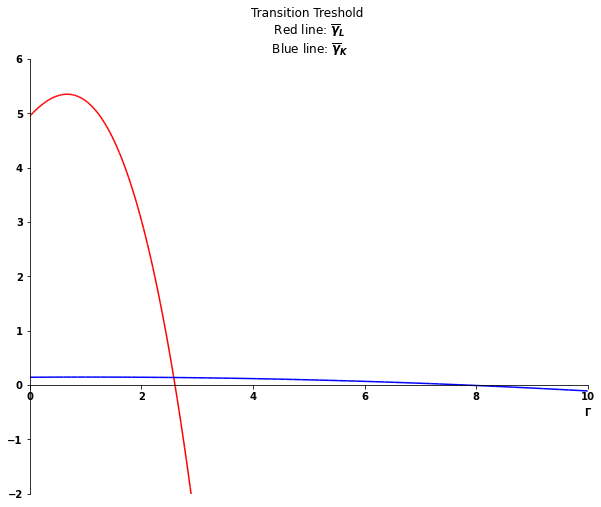


Probabilistic sniping is profitable for values of the risk aversion parameter gamma between 
the thresholds gamma_bar_K and gamma_bar_L that are the positive zero-crossing (exceeding 1) of cubic and quadratic equations.


In [ ]:
# plot the transition thresholds 
#--------

sym_plt= plot(gamma_K_cond_numeric,(gamma, 0,10),line_color ='r',xlim=[0,10], ylim=[-2,6],show=False,\
          title = 'Transition Treshold \n Red line: $\overline{\gamma}_L$ \n Blue line: $\overline{\gamma}_K$ ', xlabel = '$\Gamma$',ylabel='',adaptive =False)
sym_plt.extend(plot(gamma_L_cond_numeric,(gamma,0,10),line_color ='b',xlim=[0,10], ylim=[-.1,0.2],show=False));

sym_plt.show()

caption = '''
Probabilistic sniping is profitable for values of the risk aversion parameter gamma between 
the thresholds gamma_bar_K and gamma_bar_L that are the positive zero-crossing (exceeding 1) of cubic and quadratic equations.'''
#--------
print(caption)


##3.2.The dependancy of transition thresholds on news ($\alpha$)





{alpha: alpha, mu: 0.5, delta: 0.5, H: 5, gamma: gamma, q: 0.5, beta: 0.4736842105263158, mubar: 0.125, thetabar: 0.11842105263157895, alphabar: alphabar, -mubar + 1: 0.875, 'h': (5*p + (-p + 1)**5 - 1)/(5*p), 'g': (5*p + (-p + 1)**5 - 1)/(20*p**2), p: 1, s: 0.469950293718934}


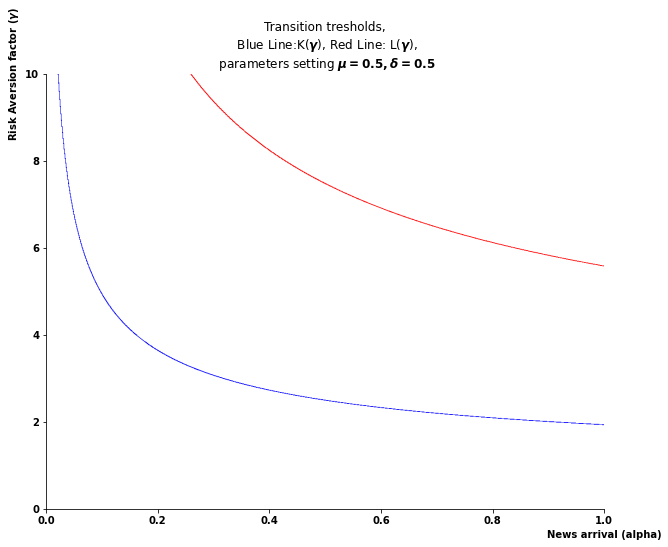

In [ ]:
# Adjust the dictionary and convert parameteres we need to symbol (In this case alpha, alphabar)
dict_adjust_alpha = copy.deepcopy(dict_subs_numerical_vals)
dict_adjust_alpha[alpha] = alpha
dict_adjust_alpha[alphabar] = alphabar

dict_adjust_alpha[gamma] = gamma

print(dict_adjust_alpha)

# Recall gamma_K_cond and gamma_L_cond in section.6 and 7 (the result of du*/dp|(p=1,0) =0)
#-------
gamma_K_cond_numeric_expr = gamma_K_cond.subs(alphabar, alpha*delta/2).subs(dict_adjust_alpha).cancel()

gamma_L_cond_numeric_expr = gamma_L_cond.subs(alphabar, alpha*delta/2).subs(dict_adjust_alpha).cancel()
#-------

# plot polynomial_L 
sym_plot_GL= plotting.plot_implicit(gamma_L_cond_numeric_expr, (alpha,0,1 ),(gamma,0,10), line_color='r', show=False)

sym_plot= plotting.plot_implicit(gamma_K_cond_numeric_expr, (alpha,0,1 ),(gamma,0,10), xlabel = 'News arrival (alpha)', ylabel = 'Risk Aversion factor ($\gamma$)', show= False,
                                 title='Transition tresholds,\n Blue Line:K($\gamma$), Red Line: L($\gamma$),\n parameters setting $\mu = {}, \delta = {}$'.format(0.5, dict_adjust_alpha[delta]))
sym_plot.extend(sym_plot_GL)
sym_plot.show()

##3.3. The dependancy of transition thresholds on LT arrival ($\mu$)

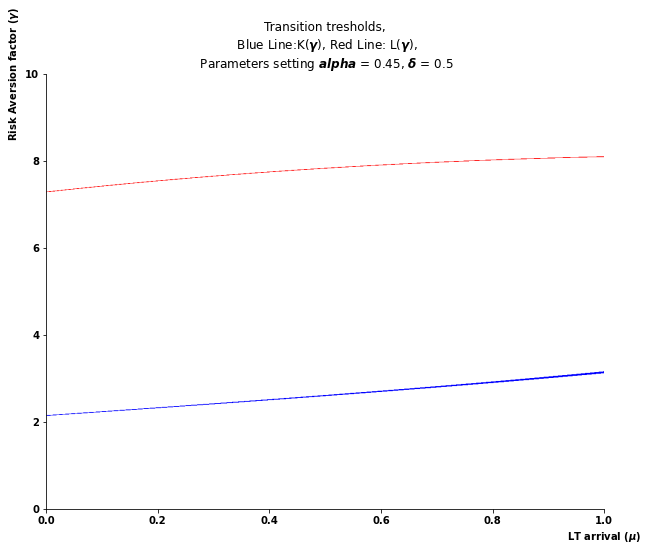

In [ ]:
# Adjust the dictionary and convert parameteres we need to symbol (mu and mubar)
dict_adjust_mu = copy.deepcopy(dict_subs_numerical_vals)
# 
dict_adjust_mu[mu] = mu
dict_adjust_mu[mubar] = mubar
dict_adjust_mu[gamma] = gamma

# Recall thresholds
gamma_K_cond_numeric_expr_2 = gamma_K_cond.subs(mubar, mu*delta/2).subs(dict_adjust_mu).cancel()
gamma_L_cond_numeric_expr_2 = gamma_L_cond.subs(mubar, mu*delta/2).subs(dict_adjust_mu).cancel()
#-------

# plot polynomial_L 
sym_plot_GL_2= plotting.plot_implicit(gamma_L_cond_numeric_expr_2, (mu,0,1 ),(gamma,0,10), line_color='r', show=False)
sym_plot_2= plotting.plot_implicit(gamma_K_cond_numeric_expr_2, (mu,0,1 ),(gamma,0,10), xlabel = 'LT arrival ($\mu$)', ylabel = 'Risk Aversion factor ($\gamma$)', show= False,
                                 title='Transition tresholds,\n Blue Line:K($\gamma$), Red Line: L($\gamma$),\n Parameters setting $alpha$ = {}, $\delta$ = {}'.format(dict_subs_numerical_vals[alpha], dict_subs_numerical_vals[delta]))
sym_plot_2.extend(sym_plot_GL_2)
sym_plot_2.show()




## 3.4. The dependency of Risk Aversion level and Equilibrium spread and utility 
**Examples of Equalibrium spread and utility from sure to no sniping**
When is probabilistic sniping advantageous? **(KPD.section.4.3, fig.6)**


Examples for $\gamma$ [1.80191810919684, 2.60383621839367, 3.5, 7.83130051063973]
<function <lambda> at 0x7fe4a3f87378>
<function <lambda> at 0x7fe4af116a60>
<function <lambda> at 0x7fe4a3f87378>
<function <lambda> at 0x7fe4af116a60>
Examples for dependency of equilibrium utility spread to thresholds (risk aversion factor) 


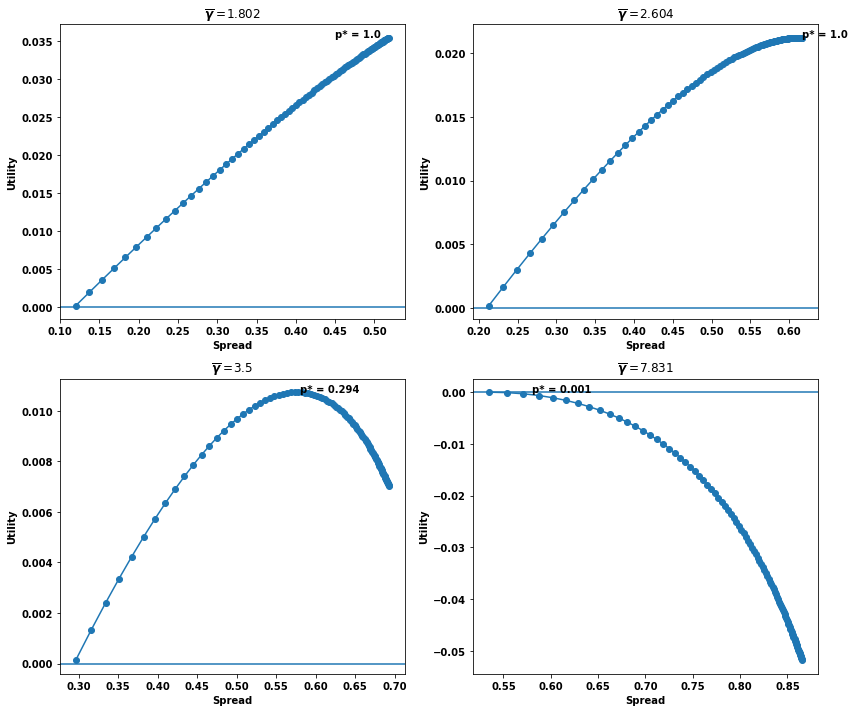

In [ ]:
# --------------------------
# First, we update dictionary of values with different examples of Risk aversion factor (gamma)

# Then, we compute the Equilibrium spread and utility with respect to examples of gamma

# Finally, we can extract p* by finding corresponding p to maximum equilibrium utility  

#----------------
# 1) Update the dictionary with different examples of gamma
dict_subs_numerical_vals[p] = p
dict_subs_numerical_vals[alphabar] = alphabar_val
dict_subs_numerical_vals[mubar] = mubar_val

#--------------------
# Define a list of risk aversion factor (gamma)
#--------------------
gamma_0 = (1+ gamma_bar_K)/2
gamma_1 = gamma_bar_K
#gamma_2 = (gamma_bar_K + gamma_bar_L)/2
gamma_2 = 3.5
gamma_3= gamma_bar_L

Gamma = [ gamma_0, gamma_1,  gamma_2, gamma_3]

dict_subs_numerical_vals[gamma] = Gamma[2]
print('Examples for $\gamma$', Gamma)

list_gamma_exmp=[];
S_star =[];
U_star = [];
for i in Gamma:
  '''
   by using examples in section 3.4
   we update the dictionary of values for each example
  '''
  dict_subs_numerical_vals[gamma]= i;
  list_gamma_exmp.append(dict_merge(dict_subs_numerical_vals));

#----------------  
# 2) Compute Equilibrium spread and uriliry for each example
#----------------    

for j in list_gamma_exmp:
  '''
  Compute euilibrium spread and utility for each example
  '''
  u_star = ( A *D - B*C)/N;
  u_star = u_star.subs({q:gamma-1});
  u_star_gamma = u_star.subs(j);
  U_star.append(u_star_gamma);

  s_star = (A - C)/ N;
  s_star = s_star.subs({q:gamma-1});
  s_star_gamma = s_star.subs(j);
  S_star.append(s_star_gamma);

#----------------
# 3) Define a range for sniping probability from zero (no-sniping) to 1 (sure sniping)
#----------------

P = np.linspace(0.001,1,100)
U_total=[]; # To store optimal utilities 
for j in U_star:
     u_star_1 = lambdify(p, j);
     print(u_star_1);
     U_total.append(u_star_1(P));
S_total =[];
for ii in S_star:
    s_star_1 = lambdify(p,ii);
    S_total.append(s_star_1(P));

#------------------
# Optimal sniping probability is when utility has the highst value (for 4 examples)
#----------------

u_max=[]; # To store maximum u* 
Id =[]; # corresponding index to find p*
for ii in U_total:
  i_max=max(ii);
  u_max.append(i_max);


for jj in u_max:
  idx = np.where(U_total == jj);
  Id.append(idx);
# print('Corresponding indices to find p* :')
# print(Id)
p_star_exp0 = P[Id[0][1]];
p_star_exp1 = P[Id[1][1]];
p_star_exp2 = P[Id[2][1]];
p_star_exp3 = P[Id[3][1]];

#----------------
# as we selected gamma = 3.5 for the computations in this notebook, 
# We choose its corresponding p_star is p_star_exp2  
p_star  = p_star_exp2 ;

print("Examples for dependency of equilibrium utility spread to thresholds (risk aversion factor) ")
fig, ax = plt.subplots(2,2, figsize=(12, 10));

ax[0,0].plot(S_total[0], U_total[0],'o-');
ax[0,0].set_title("$\overline{\gamma}$ =%s" % round(Gamma[0],3));

ax[0,0].text(0.45,u_max[0], "p* = %s" % p_star_exp0[0]);
#
ax[0,1].plot(S_total[1], U_total[1],'o-');
ax[0,1].set_title("$\overline{\gamma}$ =%s" % round(Gamma[1],3));

ax[0,1].text(max(S_total[1]),u_max[1], "p* = %s" % p_star_exp1[0]);
#
ax[1,0].plot(S_total[2], U_total[2],'o-');
ax[1,0].set_title("$\overline{\gamma}$ =%s" % round(Gamma[2],3));

ax[1,0].text(0.58,u_max[2], "p* = %s" % round(p_star_exp2[0],3));
#
ax[1,1].plot(S_total[3], U_total[3],'o-');
ax[1,1].set_title("$\overline{\gamma}$ =%s" % round(Gamma[3],3));

ax[1,1].text(0.58,u_max[3], "p* = %s" % round(p_star_exp3[0],3));

for ax in ax.flat:
    ax.set(xlabel='Spread', ylabel='Utility');
    ax.axhline(0,0)
fig.tight_layout()



# 4. Expected Utility and probabilistic sniping:


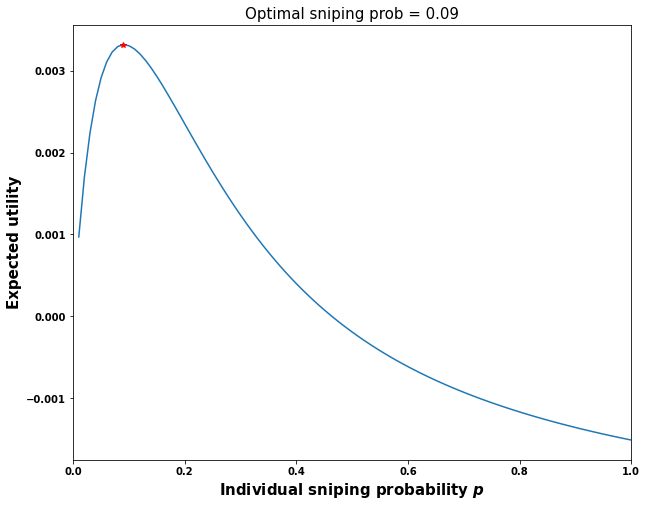

In [ ]:
dict= dict_subs_numerical_vals.copy()
dict[p] = p
dict[gamma] = 4 #(gamma_bar_K + gamma_bar_L)/2
dict['h'] = (H*p + (1 - p)**H - 1)/(H*p)
dict['g'] = (H*p + (1 - p)**H - 1)/(H*p)/((H-1)*p)

nr_agents = {H:10}
# sure
A_p_1 = A.subs(dict).subs(p,1).subs(nr_agents)
B_p_1  = B.subs(dict).subs(p,1).subs(nr_agents)
# B_p_1  = B.subs({p*g:1/H})

C_p_1 = C.subs(q, gamma-1).subs(dict).subs(p,1).subs(nr_agents)
D_p_1 = D.subs(q, gamma-1).subs(dict).subs(p,1).subs(nr_agents)
#------------------
# compute u_star (p)
u_star_pp = u_star.subs(dict).subs(nr_agents)

#------------------
# Compute max to determine p_star, s_star, u_star

uu=[] # To store maximum u*

p = Symbol ('p')
P = np.linspace(0.01,1, 100)
for i in P:
    u_star_11 = u_star_pp.subs(p,i)
    uu.append(u_star_11)

import operator
index, value = max(enumerate(uu), key=operator.itemgetter(1))

p_star_example = P[index] 

u_star_pp = u_star_pp.subs(p, p_star_example)

plt.plot(P, uu)
plt.plot(p_star_example,u_star_pp, 'r*')
plt.xlabel('Individual sniping probability $p$', fontsize = 15)
plt.ylabel('Expected utility', fontsize = 15)
plt.title('Optimal sniping prob = %s' % round(p_star_example,2), fontsize = 15)
plt.xlim(0,1);


# 5. Equilibrium utility and spread $u^*(p^*) , s^*(p^*)$

In [ ]:
# update dictionary by p_star 

dict[p] = p_star

# Collective probabilistic sniping

A_p_star = A.subs(dict).subs(nr_agents)
B_p_star  = B.subs(dict).subs(nr_agents)

C_p_star = C.subs(q, gamma-1).subs(dict).subs(nr_agents)
D_p_star = D.subs(q, gamma-1).subs(dict).subs(nr_agents)

#------------------
u_star_pp = u_star.subs(dict).subs(nr_agents)

s_star_pp = s_star.subs(dict).subs(nr_agents)

#------------------
print('s*(p*) =', s_star_pp)
print('u*(p*) = ', u_star_pp)

s*(p*) = 0.691286650479249
u*(p*) =  0.00129816018179133


#6. Quantification of deviation: 
In this section, we compute expected utility for each agent based on conditional sniping probability for trustworthy agents


In [ ]:
#--------------------
# This function computes utility for trustworthy agent as MM and Bandit
#--------------------
def compute_utility_trustworthy(Hd,Ht,alpha,mu,delta,gamma,H,p,s_star):
  
    # initial parametres 
    beta = alpha/(alpha + mu)
    alphabar  = alpha  * delta /2
    mubar = mu * delta/2
    q = gamma -1
    thetabar = 2*alphabar*mubar/(alphabar +mubar)
    m = 1- mubar

    def compute_htm_gtb(Ht,Hd,p):
      '''
      Compute ht_m (trustworthy agent as Market maker)
      and g_tb (trustworthy agent as bandit)

      '''
      H = Hd+Ht
      Nt = np.random.binomial(Ht-1, p)
      h_tm = np.mean((Hd+Nt) / (1+Hd+Nt))
      Nt_1 = np.random.binomial(Ht-2, p)
      Nt_2 = np.random.binomial(Ht-1, p)
      g_tb = np.mean(1/(2+Hd+Nt_1))*((Ht-1)/(H-1)) + np.mean(1/(1+Hd+Nt_2))*(Hd/(H-1))
      
      # Alternative computation for g_tb
      Nt = np.random.binomial(Ht-1,p)
      g_tb_2 = (1/(H-1))* np.mean(Hd*(1./(1+Nt+Hd)) + Nt/(1+Nt+Hd) + (Ht-1-Nt)/(2+Nt+Hd) )

      return h_tm, g_tb, g_tb_2
      
    h_tm = compute_htm_gtb(Ht,Hd,p)[0]
    g_tb = compute_htm_gtb(Ht,Hd,p)[1]
    g_tb_2 = compute_htm_gtb(Ht,Hd,p)[2] 


    # Compute endpoints for trustworthy bandit
    A_tb = m*beta*p*g_tb;
    B_tb = -alphabar*q*beta*p*g_tb;

    u_tb = A_tb*(1-s_star) + B_tb*s_star; # trustworthy agent as bandit   # F1  in paper fig

    # Compute endpoints for trustworthy MM
    C_tm = -(q*thetabar + beta*(m*gamma-mubar*q)*h_tm)
    D_tm = (1+mubar) - beta*(m + alphabar*q*h_tm)

    u_tm = C_tm*(1-s_star) + D_tm*s_star # trustworthy agent as MM  # F2 in paper fig

    # Weighted utility for trustworthy agents
    u_t_actual = ((H-1)/H)*u_tb + (1/H)*u_tm
    return A_tb, B_tb, C_tm, D_tm, u_tb,u_tm,u_t_actual,compute_htm_gtb(**dict_agents) 



##6.0. Expected utilites and sniping probability for trustworthy agents in Equilibrium

In [ ]:
#@title
# initial params for the case of deviation 
dict_deviation = {'alpha': alpha_val, 'mu' : mu_val, 'delta' :delta_val, 'gamma' :Gamma[2]}

dict_deviation['H'] = 5 # Total nr of agents
dict_deviation['Hd'] = 1
dict_deviation['Ht'] = 4

dict_deviation['p'] = p_star
dict_deviation['s_star'] = s_star_pp

dict_agents = {'Ht':8, 'Hd': 2, 'p':p_star}
print("--------- initial params for the case of deviation ---------")
print(dict_deviation)

# print the result (utility end points and probability)
outcome_utility = compute_utility_trustworthy(**dict_deviation)

A_tb = outcome_utility[0]
B_tb = outcome_utility[1]
C_tm = outcome_utility[2]
D_tm = outcome_utility[3]

u_tb = outcome_utility[4]
u_tm = outcome_utility[5]

u_t_actual = outcome_utility[6]

outcome_probability = outcome_utility[7]
print('')
print(outcome_utility)


--------- initial params for the case of deviation ---------
{'alpha': 0.45, 'mu': 0.5, 'delta': 0.5, 'gamma': 3.5, 'H': 5, 'Hd': 1, 'Ht': 4, 'p': array([0.29363636]), 's_star': 0.691286650479249}

(array([0.03296165]), array([-0.01059482]), -0.9473684210526316, 0.6439144736842105, array([0.00285164626614621], dtype=object), 0.152664201214923, array([0.0328141572559016], dtype=object), (0.8, 0.14166666666666666, 0.21666666666666665))


## 6.1. Visualization: expected utility for trustworthy agents in equilibrium 

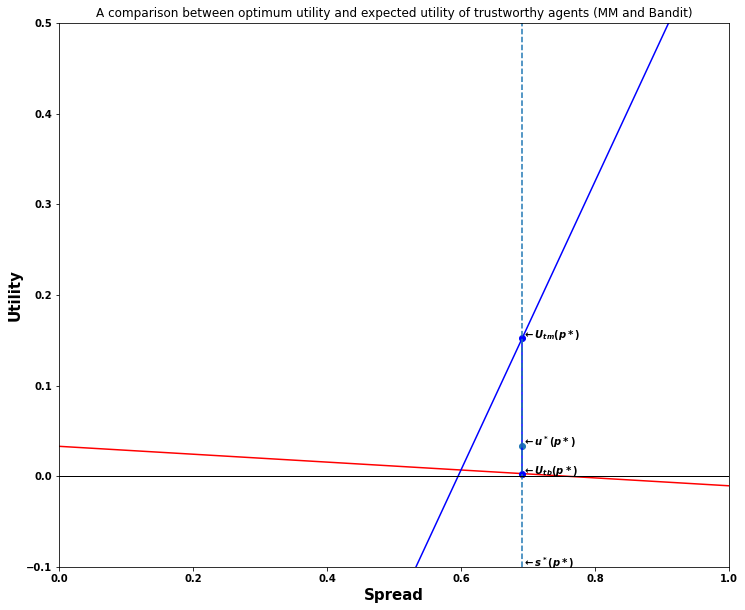

In [ ]:

fig_1 =plt.figure(1, figsize=(12, 10))

plt.plot([0,1], [A_tb, B_tb], 'r') # end points Bandit utility
plt.plot([0,1],[C_tm,D_tm], 'b')   # End points MM utility

plt.plot(s_star_pp , u_t_actual,'o') # optimum spread and weighted utility for trustworthy agent
plt.plot(s_star_pp, u_star_pp, '*')  # optimum spread and utility 

plt.plot([s_star_pp, s_star_pp], [u_tb,u_tm], 'bo-') # Bandit & MM utility

# Add description to each point
plt.text(s_star_pp, u_tb, '$\leftarrow U_{tb}(p*)$')
plt.text(s_star_pp, u_tm, '$\leftarrow U_{tm}(p*)$')
plt.text(s_star_pp, u_t_actual, '$\leftarrow u^*(p*)$')

plt.text(s_star_pp, -.1, '$\leftarrow s^*(p*)$')
plt.axvline(s_star_pp,linestyle='--')
plt.axhline(linewidth=1, color='k')
plt.xlabel('Spread', fontsize = 15)
plt.ylabel('Utility', fontsize = 15)
# To zoom in the plot for clearer vision
plt.xlim(0,1);
plt.ylim(-.1,.5);
plt.title('A comparison between optimum utility and expected utility of trustworthy agents (MM and Bandit)');


##6.2. Visualization: expected utility for deceptive agents in equilibrium 

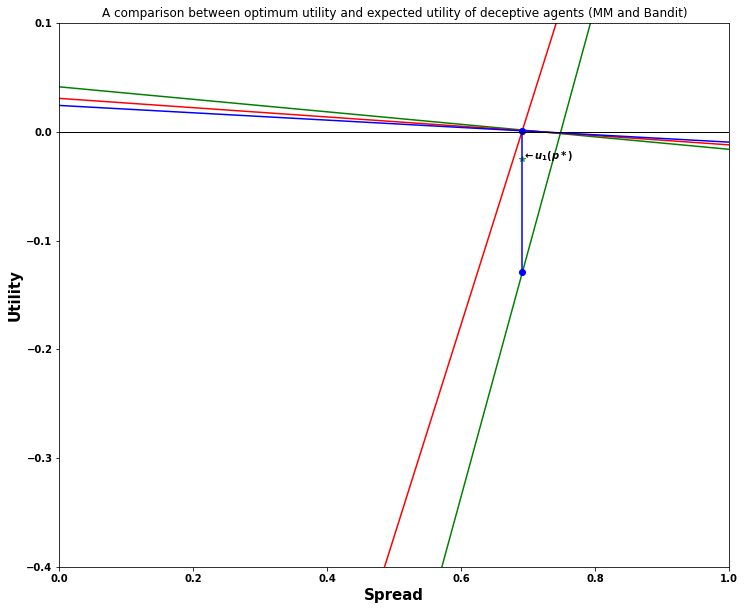

In [ ]:
#  Utilities for a single honest sniper who is competing with H-1 
#  deceptive agents that snipe for sure

# call A, B , g = 1/H
A_1 = m*beta*p/H;
B_1 = -alphabar*q*beta*p/H;

A_1 = A_1.subs(dict).subs(nr_agents)
B_1 = B_1.subs(q, gamma-1).subs(dict).subs(nr_agents)


# Utility of the honest agent as bandit
u_1_as_bandit = A_1*(1-s_star_pp) + B_1*s_star_pp;  
u_1_as_bandit = u_1_as_bandit.subs(dict)
# Utility of the honest agent as market maker 
u_1_as_marketmaker = C_p_1*(1-s_star_pp) + D_p_1*s_star_pp   
u_1_as_marketmaker = u_1_as_marketmaker.subs(dict)
# Expected utility of honest agent (weighted for role as bandit or market
# maker): 

u_1_actual = ((H-1)/H)*u_1_as_bandit + (1/H)*u_1_as_marketmaker
u_1_actual = u_1_actual.subs(dict)

#--------------
import matplotlib.pyplot as plt

fig_1 =plt.figure(1, figsize=(12, 10))

plt.plot([0,1], [A_p_1, B_p_1], 'g') # Bandit utility (p=1)
plt.plot([0,1],[C_p_1,D_p_1], 'g')   # MM utility (p=1)

plt.plot([0,1], [A_p_star, B_p_star], 'r')  # Bandit utility (p=p*)
plt.plot([0,1],[C_p_star ,D_p_star], 'r')   # MM utility (p=p*)

plt.plot([0,1], [A_1,B_1], 'b') # bandit utility when(g =1/H)

plt.plot([s_star_pp, s_star_pp], [0 , u_star_pp],':')
plt.plot(s_star_pp, u_star_pp, marker = 'o')
plt.plot(s_star_pp, u_1_actual, marker = '*')
plt.text(s_star_pp, u_1_actual, '$\leftarrow u_1(p*)$')

plt.plot([s_star_pp, s_star_pp], [u_1_as_bandit,u_1_as_marketmaker], 'bo-')

plt.axhline(linewidth=1, color='k')
plt.xlabel('Spread', fontsize = 15)
plt.ylabel('Utility', fontsize = 15)
plt.title('A comparison between optimum utility and expected utility of deceptive agents (MM and Bandit)');
# To zoom in the plot for clearer vision
plt.xlim(0,1)
plt.ylim(-.4,0.1);

